## __Homework_2__

In [1]:
import numpy as np

# _Task 1_ 

In [2]:
a = np.random.rand(10,3)
print(a,'\n')
for row in a:
    closest = -1
    for i in row:
        if abs(i-0.5) < abs(closest-0.5):
            closest = i
    print(closest) 

[[0.40446283 0.90642396 0.896858  ]
 [0.34984778 0.71413891 0.37814926]
 [0.27418431 0.94771879 0.93563598]
 [0.10046551 0.92527297 0.43756965]
 [0.19206393 0.41320091 0.40477292]
 [0.07179455 0.64685107 0.37268647]
 [0.43536599 0.82093313 0.97720982]
 [0.63849571 0.98354268 0.85311953]
 [0.56517319 0.81516956 0.72398442]
 [0.87860395 0.78339393 0.15613431]] 

0.4044628279874807
0.37814925942202815
0.274184309549491
0.4375696482337672
0.41320091218542554
0.37268646615685597
0.4353659941367347
0.6384957137128048
0.5651731899382377
0.7833939269233348


# _Task 2_

In [3]:
a = np.random.rand(6,6) * 10
print(a,'\n')
for n in range(6):
    print(a[n].sum()/a[:,n].min())

[[2.48841326 0.38707654 0.88422339 0.26337871 8.91017761 4.0510644 ]
 [8.52110553 7.08834373 4.22560335 2.7264705  2.04175361 3.91678576]
 [8.25946387 0.54878553 3.83497876 5.65194452 9.98282931 3.30955499]
 [3.50282272 6.24962263 3.16994806 5.85990576 4.70309715 9.97338549]
 [8.75322396 8.64772748 2.68665073 4.95095048 9.13094812 9.40424315]
 [6.01257504 5.45014483 7.75864238 8.02631068 6.59009041 8.61417143]] 

6.825367068531909
73.68068020805065
35.72350313234892
127.0367739032867
21.341333093185778
12.82708244834677


# _Task 3_

In [4]:
x = np.array([6,2,0,3,0,0,5,7,0])
max = 0
for n in range(1,len(x)):
    if x[n-1] == 0:
        if x[n] > max:
            max = x[n]
print(max)

5


# _Task 4_

In [5]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for index in i:
    x[index] += 1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


## __K-means__

In [6]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:5] #CustomerID, Genre, Age, Annual Income (k$), Spending Score (1-100)

array([['0001', 'Male', '19', '15', '39'],
       ['0002', 'Male', '21', '15', '81'],
       ['0003', 'Female', '20', '16', '6'],
       ['0004', 'Female', '23', '16', '77'],
       ['0005', 'Female', '31', '17', '40']], dtype=object)

In [7]:
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
data[:5]

array([[ 1.,  1., 19., 15., 39.],
       [ 2.,  1., 21., 15., 81.],
       [ 3.,  0., 20., 16.,  6.],
       [ 4.,  0., 23., 16., 77.],
       [ 5.,  0., 31., 17., 40.]])

In [8]:
import matplotlib.pyplot as plt

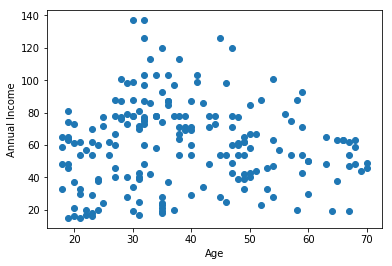

In [9]:
plt.scatter(data[:, 2], data[:, 3])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

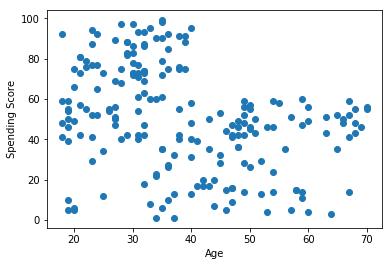

In [10]:
plt.scatter(data[:, 2], data[:, 4])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

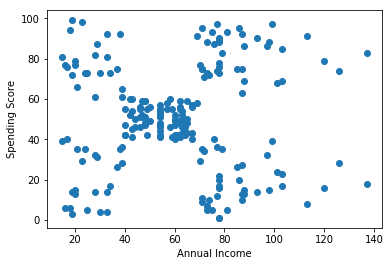

In [11]:
plt.scatter(data[:, 3], data[:, 4])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Data standardizaton

In [12]:
def standardization(data):   # data is 2D-array
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    return (data - mean)/std

In [13]:
standardized = standardization(data[:,2:])
print(standardized[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


In [14]:
import numpy.random 
from scipy.spatial import distance

In [15]:
def re_evaluate (obs, code_book):
    new_code_book = np.empty((len(code_book),len(code_book[0])))
    distortion = distance.cdist(obs, code_book, 'sqeuclidean')
    temp = np.hstack((obs, distortion.argmin(axis=1).reshape(len(distortion),1)))
    for i in range(len(code_book)):
        new_code_book[i] = np.vstack(row for row in temp if row[-1] == i).mean(axis=0)[:-1]
        
    return new_code_book        

In [16]:
def kmeans(obs, k_or_guess, iter=20, thresh=1e-05): #k_or_guess has int or ndarray type
    if type(k_or_guess) == int:
        code_book = obs[np.random.choice(range(len(obs)), k_or_guess, False)]
    else:
        code_book = k_or_guess
    prev_distortion = -1
    cur_distortion = distance.cdist(obs, code_book, 'sqeuclidean').min(axis = 1).sum()
    
    while abs(cur_distortion - prev_distortion) > thresh:
        code_book = re_evaluate (obs, code_book)
        prev_distortion = cur_distortion
        cur_distortion = distance.cdist(obs, code_book, 'sqeuclidean').min(axis = 1).sum()
        
    return code_book, cur_distortion 
    

# /////////////// (it works)

In [31]:
codebook, distor = kmeans(standardized[:,[1,2]], 5)

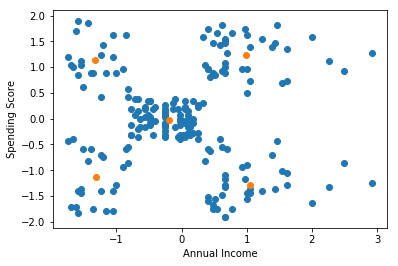

In [32]:
plt.scatter(standardized[:, 1], standardized[:, 2])
plt.scatter(codebook[:,0],codebook[:,1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# ////////////////

# 1st slice

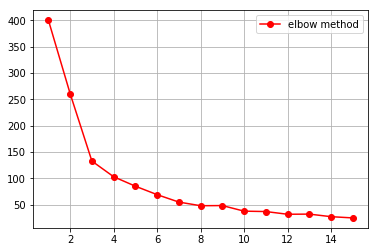

In [19]:
dist_k = np.empty(15)
for i in range(1,16):
    codebook, distor = kmeans(standardized[:,[0,1]], i)
    dist_k[i-1] = distor
plt.plot(range(1,16), dist_k, 'o-r', label = "elbow method")
plt.legend()
plt.grid(True)

# _k = 3 is optimal_

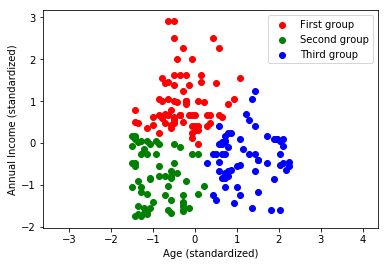

In [20]:
codebook, distor = kmeans(standardized[:,[0,1]], 3)

distortion = distance.cdist(standardized[:,[0,1]], codebook, 'sqeuclidean')
matrix = np.hstack((standardized[:,[0,1]], distortion.argmin(axis=1).reshape(len(distortion),1)))
block1 = np.vstack(row for row in matrix if row[-1] == 0)
block2 = np.vstack(row for row in matrix if row[-1] == 1)
block3 = np.vstack(row for row in matrix if row[-1] == 2)

plt.scatter(block1[:,0], block1[:,1], c='r', label='First group')
plt.scatter(block2[:,0], block2[:,1], c='g', label='Second group')
plt.scatter(block3[:,0], block3[:,1], c='b', label='Third group')
plt.axis('equal')
plt.xlabel("Age (standardized)")
plt.ylabel('Annual Income (standardized)')
plt.legend()
plt.show()

Вся база разбита на 3 кластера - молодые люди, люди среднего возраста, пожилые люди.
Ярко выражено, что самый большой годовой доход приходится на группу среднего возраста. Молодые и относительно пожилые люди имеют меньший доход (что весьма ожидаемо).

# 2nd slice

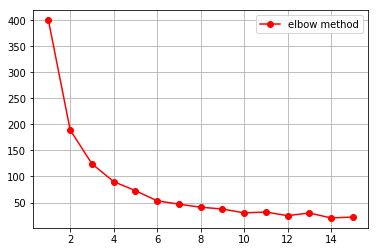

In [22]:
dist_k = np.empty(15)
for i in range(1,16):
    codebook, distor = kmeans(standardized[:,[0,2]], i)
    dist_k[i-1] = distor
plt.plot(range(1,16), dist_k, 'o-r', label = "elbow method")
plt.legend()
plt.grid(True)

# _k = 4 is optimal_

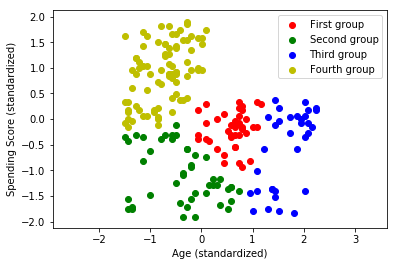

In [25]:
codebook, distor = kmeans(standardized[:,[0,2]], 4)

distortion = distance.cdist(standardized[:,[0,2]], codebook, 'sqeuclidean')
matrix = np.hstack((standardized[:,[0,2]], distortion.argmin(axis=1).reshape(len(distortion),1)))
block1 = np.vstack(row for row in matrix if row[-1] == 0)
block2 = np.vstack(row for row in matrix if row[-1] == 1)
block3 = np.vstack(row for row in matrix if row[-1] == 2)
block4 = np.vstack(row for row in matrix if row[-1] == 3)


plt.scatter(block1[:,0], block1[:,1], c='r', label='First group')
plt.scatter(block2[:,0], block2[:,1], c='g', label='Second group')
plt.scatter(block3[:,0], block3[:,1], c='b', label='Third group')
plt.scatter(block4[:,0], block4[:,1], c='y', label='Fourth group')

plt.axis('equal')
plt.xlabel("Age (standardized)")
plt.ylabel('Spending Score (standardized)')
plt.legend()
plt.show()

В этом разрезе заметно, что 1,2 и 3 кластеры поделены достаточно условно (это видно и на кривой elbow method). Но ярко выражен тот факт, что относительно более молодая группа потребителей (4) имеет более высокий Spending Score. Молодые потребители более выгодны (в каком ключе - зависит от принципа подсчета score) магазину.

# 3rd slice

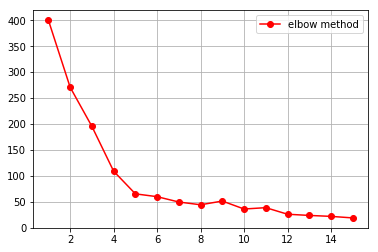

In [22]:
dist_k = np.empty(15)
for i in range(1,16):
    codebook, distor = kmeans(standardized[:,[1,2]], i)
    dist_k[i-1] = distor
plt.plot(range(1,16), dist_k, 'o-r', label = "elbow method")
plt.legend()
plt.grid(True)

# _k = 5 is optimal_

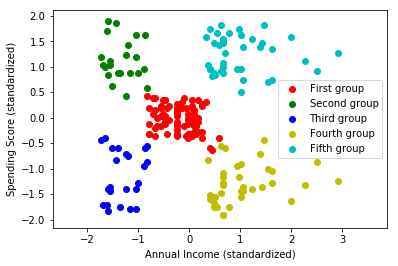

In [31]:
codebook, distor = kmeans(standardized[:,[1,2]], 5)

distortion = distance.cdist(standardized[:,[1,2]], codebook, 'sqeuclidean')
matrix = np.hstack((standardized[:,[1,2]], distortion.argmin(axis=1).reshape(len(distortion),1)))
block1 = np.vstack(row for row in matrix if row[-1] == 0)
block2 = np.vstack(row for row in matrix if row[-1] == 1)
block3 = np.vstack(row for row in matrix if row[-1] == 2)
block4 = np.vstack(row for row in matrix if row[-1] == 3)
block5 = np.vstack(row for row in matrix if row[-1] == 4)


plt.scatter(block1[:,0], block1[:,1], c='r', label='First group')
plt.scatter(block2[:,0], block2[:,1], c='g', label='Second group')
plt.scatter(block3[:,0], block3[:,1], c='b', label='Third group')
plt.scatter(block4[:,0], block4[:,1], c='y', label='Fourth group')
plt.scatter(block5[:,0], block5[:,1], c='c', label='Fifth group')


plt.axis('equal')
plt.xlabel("Annual Income (standardized)")
plt.ylabel('Spending Score (standardized)')
plt.legend()
plt.show()

Здесь особенно четко выражены 5 кластеров, что хорошо заметно и при elbow method. Самый крупный кластер - со средним годовым доходом и средним score (что также ожидаемо). Остальные кластеры расположены довольно симметрично. 